In [1]:
import pandas as pd
import os 
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [5]:
flight_data_filtered_cleaned = pd.read_csv("data/flight_data_filtered_cleaned.csv")

In [6]:
flight_data_filtered_cleaned

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,flight_duration,flight_distance,year_month
0,DAL1785,DL1785,a44197,N3732J,B738,KATL,KATL,2021-12-31 14:57:21+00:00,2022-01-01 01:12:06+00:00,2022-01-01 00:00:00+00:00,33.634872,-84.452577,304.8,33.631851,-84.412948,335.28,10.245833,3.684255,2022-01
1,AAL2122,NaN,ad4747,N955AN,B738,KORD,KORD,2021-12-31 16:20:43+00:00,2022-01-01 01:44:14+00:00,2022-01-01 00:00:00+00:00,41.969055,-87.907791,0.0,41.967545,-87.894620,NaN,9.391944,1.101802,2022-01
2,DAL630,DL630,a15b05,N187DN,B763,KLAX,KLAX,2021-12-31 17:47:41+00:00,2022-01-01 02:21:50+00:00,2022-01-01 00:00:00+00:00,33.947845,-118.425723,0.0,33.952560,-118.397921,129.54,8.569167,2.617479,2022-01
3,AAL2089,NaN,ad9003,N973NN,B738,KORD,KSNA,2021-12-31 19:24:33+00:00,2022-01-01 00:22:11+00:00,2022-01-01 00:00:00+00:00,41.983787,-87.882513,304.8,33.707218,-117.848911,251.46,4.960556,2770.623900,2022-01
4,VOI5821,NaN,a6810d,N518VL,A320,KDEN,MMTJ,2021-12-31 19:25:03+00:00,2022-01-01 08:51:10+00:00,2022-01-01 00:00:00+00:00,39.876709,-104.614862,1828.8,32.538666,-116.951880,167.64,13.435278,1372.937428,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504106,SWA683,NaN,abdc9b,N8632A,B738,KATL,KMCO,2022-12-31 22:49:39+00:00,2022-12-31 23:50:48+00:00,2022-12-31 00:00:00+00:00,33.634827,-84.437050,304.8,28.457428,-81.327245,53.34,1.019167,647.356771,2022-12
504107,DAL2582,NaN,a44291,N3739P,B738,KATL,KSAV,2022-12-31 22:55:00+00:00,2022-12-31 23:37:06+00:00,2022-12-31 00:00:00+00:00,33.635056,-84.448373,304.8,32.127960,-81.138153,251.46,0.701667,351.586662,2022-12
504108,DAL465,NaN,a15b05,N187DN,B763,KLAX,NaN,2022-12-31 23:00:46+00:00,2022-12-31 23:20:20+00:00,2022-12-31 00:00:00+00:00,33.947614,-118.426380,0.0,32.825985,-120.018404,10363.20,0.326111,193.393709,2022-12
504109,AAL1728,NaN,a08021,N131NN,A321,KDFW,NaN,2022-12-31 23:06:35+00:00,2022-12-31 23:57:34+00:00,2022-12-31 00:00:00+00:00,32.880936,-97.030261,304.8,34.964310,-90.109135,2689.86,0.849722,679.131824,2022-12


In [7]:
flights_per_month = flight_data_filtered_cleaned.groupby('year_month')['day'].count().reset_index(name='num_flights')


flight_data_with_counts = flight_data_filtered_cleaned.merge(flights_per_month, on='year_month', how='left')


In [9]:
flight_data_with_counts.head()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,flight_duration,flight_distance,year_month,num_flights
0,DAL1785,DL1785,a44197,N3732J,B738,KATL,KATL,2021-12-31 14:57:21+00:00,2022-01-01 01:12:06+00:00,2022-01-01 00:00:00+00:00,33.634872,-84.452577,304.8,33.631851,-84.412948,335.28,10.245833,3.684255,2022-01,38570
1,AAL2122,NaN,ad4747,N955AN,B738,KORD,KORD,2021-12-31 16:20:43+00:00,2022-01-01 01:44:14+00:00,2022-01-01 00:00:00+00:00,41.969055,-87.907791,0.0,41.967545,-87.894620,NaN,9.391944,1.101802,2022-01,38570
2,DAL630,DL630,a15b05,N187DN,B763,KLAX,KLAX,2021-12-31 17:47:41+00:00,2022-01-01 02:21:50+00:00,2022-01-01 00:00:00+00:00,33.947845,-118.425723,0.0,33.952560,-118.397921,129.54,8.569167,2.617479,2022-01,38570
3,AAL2089,NaN,ad9003,N973NN,B738,KORD,KSNA,2021-12-31 19:24:33+00:00,2022-01-01 00:22:11+00:00,2022-01-01 00:00:00+00:00,41.983787,-87.882513,304.8,33.707218,-117.848911,251.46,4.960556,2770.623900,2022-01,38570
4,VOI5821,NaN,a6810d,N518VL,A320,KDEN,MMTJ,2021-12-31 19:25:03+00:00,2022-01-01 08:51:10+00:00,2022-01-01 00:00:00+00:00,39.876709,-104.614862,1828.8,32.538666,-116.951880,167.64,13.435278,1372.937428,2022-01,38570


## -----------------------------------------------------------------------------------------------------------------

# data wrangling ,eda and model building 

In [10]:
daily_flights_per_airport = flight_data_filtered_cleaned.groupby(['typecode','origin', 'day']).size().reset_index(name='num_flights')


In [11]:
daily_flights_per_airport

,typecode,origin,day,num_flights
0,A320,KATL,2022-01-01 00:00:00+00:00,43
1,A320,KATL,2022-01-02 00:00:00+00:00,49
2,A320,KATL,2022-01-03 00:00:00+00:00,59
3,A320,KATL,2022-01-04 00:00:00+00:00,62
4,A320,KATL,2022-01-05 00:00:00+00:00,61
...,...,...,...,...
10426,B772,KORD,2022-12-27 00:00:00+00:00,7
10427,B772,KORD,2022-12-28 00:00:00+00:00,12
10428,B772,KORD,2022-12-29 00:00:00+00:00,9
10429,B772,KORD,2022-12-30 00:00:00+00:00,9


In [12]:
df_kdfw_flights = daily_flights_per_airport[daily_flights_per_airport['origin'] == 'KDFW'].copy()
df_kdfw_flights['day'] = pd.to_datetime(df_kdfw_flights['day']).dt.tz_localize(None)
df_kdfw_flights['weekday'] = df_kdfw_flights['day'].dt.dayofweek
df_kdfw_flights['month'] = df_kdfw_flights['day'].dt.month
df_kdfw_flights['year'] = df_kdfw_flights['day'].dt.year
df_kdfw_flights_sorted = df_kdfw_flights.sort_values('day')

df_kdfw_flights_sorted.head(20)
#monday 0 tuesday 1 wednesday 2 thursday 3 friday 4 saturday 5 sunday 6

,typecode,origin,day,num_flights,weekday,month,year
730,A320,KDFW,2022-01-01,29,5,1,2022
7276,B763,KDFW,2022-01-01,1,5,1,2022
2920,A321,KDFW,2022-01-01,104,5,1,2022
9190,B772,KDFW,2022-01-01,9,5,1,2022
5110,B738,KDFW,2022-01-01,101,5,1,2022
5111,B738,KDFW,2022-01-02,136,6,1,2022
731,A320,KDFW,2022-01-02,39,6,1,2022
2921,A321,KDFW,2022-01-02,147,6,1,2022
7277,B763,KDFW,2022-01-02,1,6,1,2022
9191,B772,KDFW,2022-01-02,10,6,1,2022


In [13]:
def month_to_season(month):
    # Define the mapping from month to season
    month_season = {
        12: 'Winter', 1: 'Winter', 2: 'Winter', # December to February is winter
        3: 'Spring', 4: 'Spring', 5: 'Spring', # March to May is spring
        6: 'Summer', 7: 'Summer', 8: 'Summer', # June to August is summer
        9: 'Autumn', 10: 'Autumn', 11: 'Autumn' # September to November is autumn
    }
    return month_season.get(month, 'Unknown')  # Return 'Unknown' if month is not in dictionary

# Apply the function to the 'month' column to create a new 'season' column
df_kdfw_flights_sorted['season'] = df_kdfw_flights_sorted['month'].apply(month_to_season)


In [14]:
df_kdfw_flights_sorted

,typecode,origin,day,num_flights,weekday,month,year,season
730,A320,KDFW,2022-01-01,29,5,1,2022,Winter
7276,B763,KDFW,2022-01-01,1,5,1,2022,Winter
2920,A321,KDFW,2022-01-01,104,5,1,2022,Winter
9190,B772,KDFW,2022-01-01,9,5,1,2022,Winter
5110,B738,KDFW,2022-01-01,101,5,1,2022,Winter
...,...,...,...,...,...,...,...,...
3284,A321,KDFW,2022-12-31,169,5,12,2022,Winter
7570,B763,KDFW,2022-12-31,3,5,12,2022,Winter
5474,B738,KDFW,2022-12-31,174,5,12,2022,Winter
1094,A320,KDFW,2022-12-31,47,5,12,2022,Winter


# Model Building


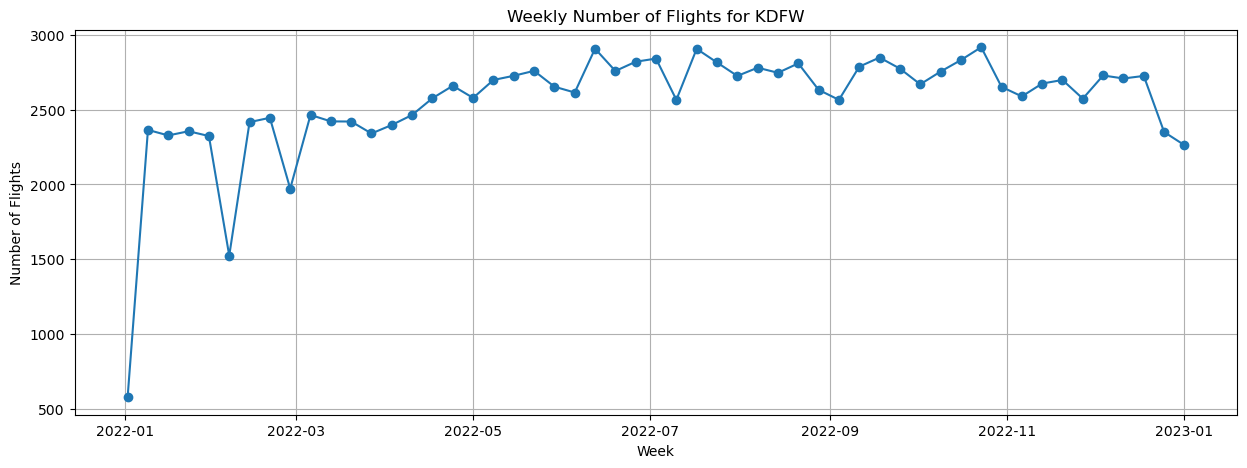

In [15]:
import pandas as pd

df_kdfw_flights.set_index('day', inplace=True)

# resample to weekly flights and sum up the 'num_flights' for each week
weekly_flights = df_kdfw_flights['num_flights'].resample('W').sum()

# Reset the index so that 'day' becomes a column again and you have a 'num_flights' column with weekly totals
weekly_flights = weekly_flights.reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(weekly_flights['day'], weekly_flights['num_flights'], marker='o')
plt.title('Weekly Number of Flights for KDFW')
plt.xlabel('Week')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()


Weekly Number of Flights for KDFW: This line chart displays the number of flights per week over a year. There are some noticeable dips and peaks, indicating fluctuations in the weekly number of flights. These could be due to a variety of factors like holidays, seasonal demand, or special events.

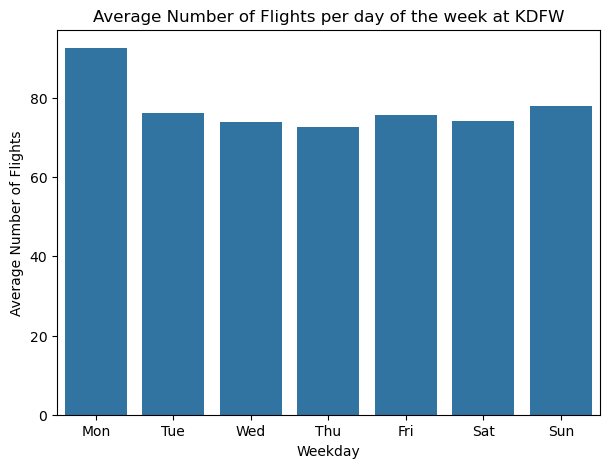

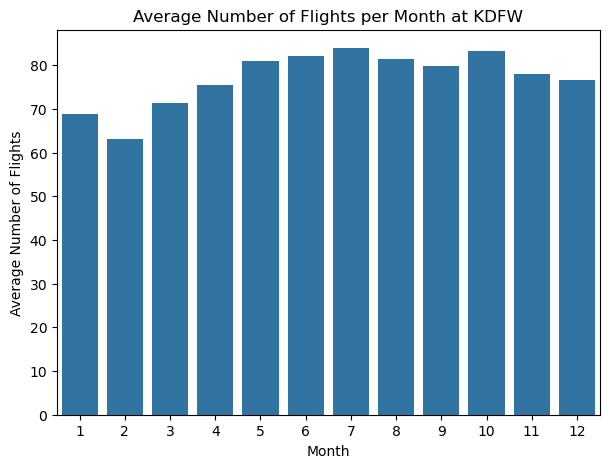

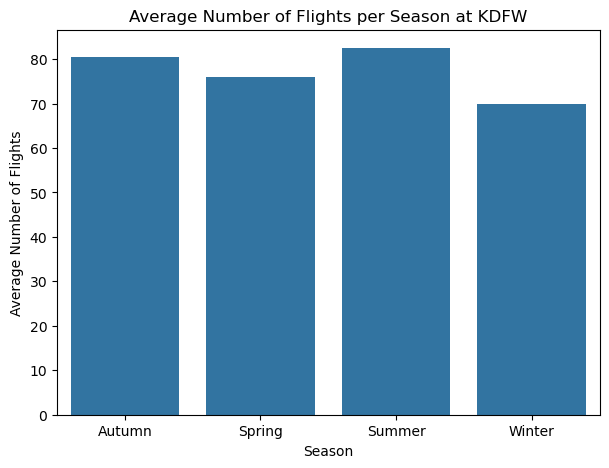

In [16]:
df_kdfw_flights_sorted.set_index('day', inplace=True)

# Plotting average number of flights per weekday
plt.figure(figsize=(7,5))
avg_weekday_flights = df_kdfw_flights_sorted.groupby(df_kdfw_flights_sorted.index.dayofweek)['num_flights'].mean()
sns.barplot(x=avg_weekday_flights.index, y=avg_weekday_flights.values)
plt.title('Average Number of Flights per day of the week at KDFW')
plt.ylabel('Average Number of Flights')
plt.xlabel('Weekday')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Plotting average number of flights per month
plt.figure(figsize=(7,5))
avg_month_flights = df_kdfw_flights_sorted.groupby(df_kdfw_flights_sorted.index.month)['num_flights'].mean()
sns.barplot(x=avg_month_flights.index, y=avg_month_flights.values)
plt.title('Average Number of Flights per Month at KDFW')
plt.ylabel('Average Number of Flights')
plt.xlabel('Month')
plt.show()


# Plotting average number of flights per season
plt.figure(figsize=(7,5))
avg_season_flights = df_kdfw_flights_sorted.groupby('season')['num_flights'].mean().reset_index()
sns.barplot(x='season', y='num_flights', data=avg_season_flights)
plt.title('Average Number of Flights per Season at KDFW')
plt.xlabel('Season')
plt.ylabel('Average Number of Flights')
plt.show()

Average Number of Flights per Month at KDFW:  The bars appear fairly uniform, suggesting that the average number of flights does not vary drastically from month to month.

Average Number of Flights per Day of the Week at KDFW:  There is a noticeable decrease in the average number of flights on Thursday, indicating that there are fewer flights on this day compared to other days of the week.

Average Number of Flights per Season: 
1. Summer: Has the highest average number of flights compared to other seasons. This might suggest a peak in travel or flight operations during this season at KDFW. 

2. Spring: Shows slightly fewer flights on average than Autumn, but the count is still relatively high, indicating it's also a busy season. 

3. Autumn:The average flight numbers remain high and are comparable to Spring, which could imply consistent travel demand or operations throughout the warmer months of the year.  

4. Winter: Displays the lowest average number of flights among the seasons. This could be due to various factors such as reduced travel during the holiday season, adverse weather conditions leading to flight cancellations or delays, or a general seasonal downturn in flight operations.

The difference in the number of flights across the seasons is not extremely pronounced, suggesting a somewhat stable demand or flight operation throughout the year, with a slight dip in the winter.

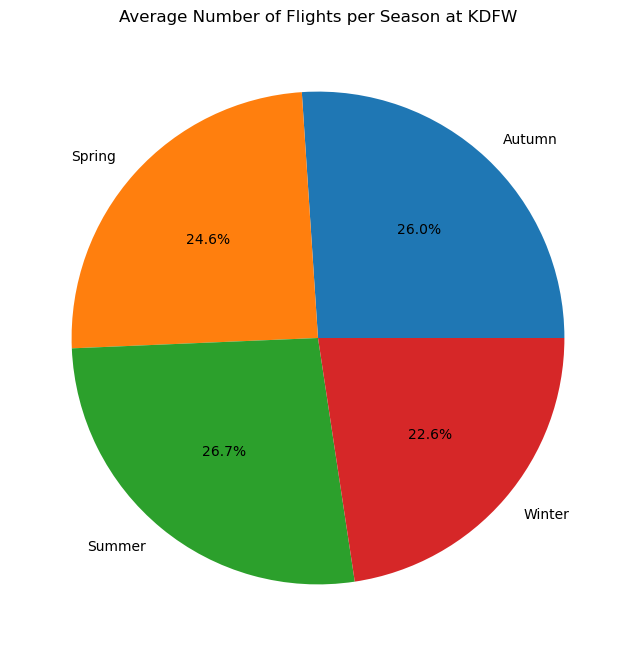

In [17]:
import matplotlib.pyplot as plt

# Plotting average number of flights per season as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_season_flights['num_flights'], labels=avg_season_flights['season'], autopct='%1.1f%%')
plt.title('Average Number of Flights per Season at KDFW')
plt.show()


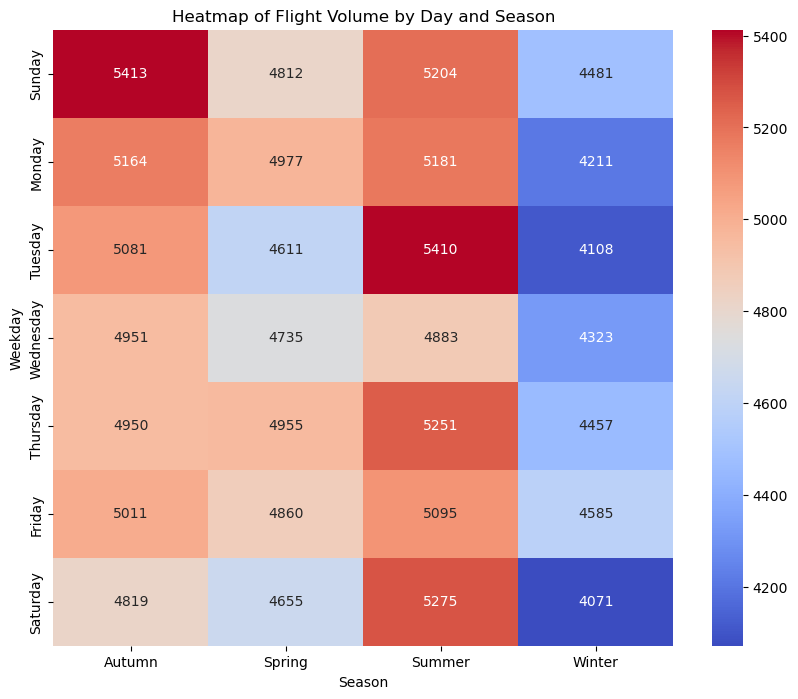

In [18]:
df_grouped = df_kdfw_flights_sorted.groupby(['weekday', 'season'])['num_flights'].sum().reset_index()
pivot_table = df_grouped.pivot(index='weekday', columns='season', values='num_flights')

# Updating the index to use day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pivot_table.index = day_names

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm')
plt.title("Heatmap of Flight Volume by Day and Season")
plt.ylabel("Weekday")
plt.xlabel("Season")
plt.show()

In [19]:


# Defining the feature set X and the target variable y
X = df_kdfw_flights_sorted[['typecode', 'weekday', 'month', 'year','season']]  
y = df_kdfw_flights_sorted['num_flights']
# Define categorical and numerical columns
categorical_features = ['typecode','season']
numerical_features = ['weekday', 'month', 'year']  

# Create transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # to keep the numerical features
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 263.80521400033257
R-squared: 0.953519681761081


In [20]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# The cross-validation scores are negative (to facilitate maximization), so we need to negate them
mse_scores = -scores
print(f"Cross-validated MSEs: {mse_scores}")
print(f"Mean cross-validated MSE: {mse_scores.mean()}")
print(f"Standard deviation of MSEs: {mse_scores.std()}")


Cross-validated MSEs: [294.23228073 259.65712456 390.85715446 233.7942439  297.54515842]
Mean cross-validated MSE: 295.21719241300394
Standard deviation of MSEs: 53.27417544674617


Cross-Validated MSE Statistics:

Mean cross-validated MSE: The mean of the MSE from cross-validation is approximately 310.37. This value is an estimate of the model's prediction error on unseen data.
Standard deviation of MSEs: A standard deviation of about 59.10 suggests that there is some variability in the model's performance across different folds of cross-validation. The lower this value, the more consistent the model's performance.

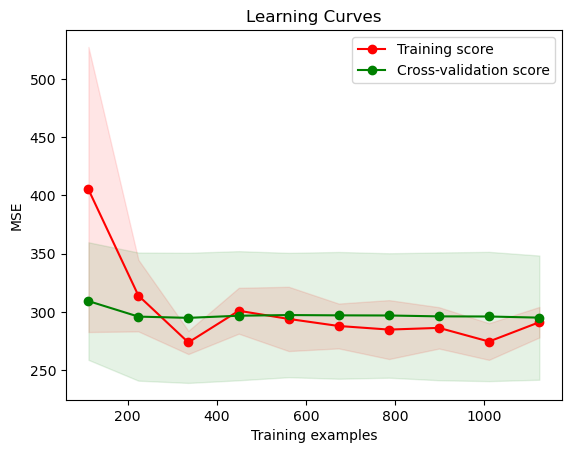

In [21]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()


This plot shows the Mean Squared Error (MSE) of the training set and the cross-validation set across different numbers of training examples.

Training Score (Red Line): This line starts very high when the number of training examples is small, indicating that the model does not generalize well with a small amount of data. However, as more data points are added, the MSE decreases and then levels off, which is a typical behavior, showing that the model is learning from the data.

Cross-Validation Score (Green Line): The cross-validation score starts lower than the training score, suggesting that the model initially generalizes better on unseen data. As more data is added, the MSE decreases and then stabilizes, becoming closer to the training score.

Shaded Areas: The red and green shaded areas represent the variance of the training and cross-validation scores, respectively. A large shaded area indicates high variance, while a narrow area indicates low variance.

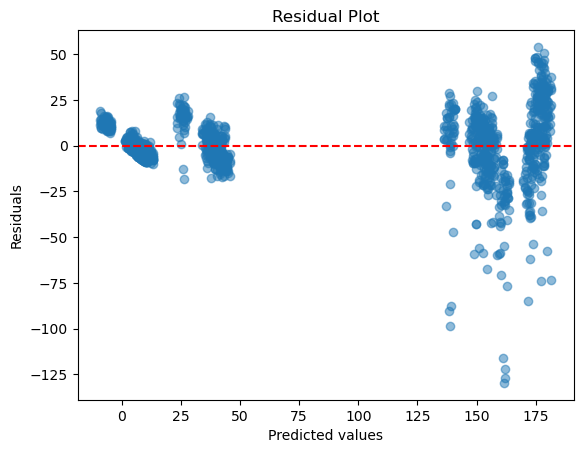

In [22]:
# Predict on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate the residuals
residuals = y_train - y_train_pred

# Plot the residuals
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Residual Plot: This plot shows the residuals (the differences between the predicted values and the actual values) on the y-axis and the predicted values on the x-axis.

The residuals should ideally be randomly dispersed around the horizontal line at zero (indicated by the dashed red line), which would indicate that the model's predictions are unbiased. However, the plot shows a pattern where residuals are not randomly dispersed; instead, they show a clear structure, especially for higher predicted values. This indicates that the model may be underfitting and not capturing some of the complexities of the data.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming flight_data_with_counts is your dataframe with flights data.

# Define the features and target variable
X = df_kdfw_flights_sorted[['typecode', 'origin','year', 'month']]
y = df_kdfw_flights_sorted['num_flights']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numeric and categorical features
numeric_features = ['year', 'month']
numeric_transformer = StandardScaler()

categorical_features = ['typecode', 'origin']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Ridge regression pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])

# Train the Ridge regression model
ridge_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_pipeline.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 269.5370867627052
R^2 Score: 0.9525097727222865


## -----------------------------------------------------------------------------------------------------------------

# ANOVA TEST


In [24]:
season_counts = df_kdfw_flights_sorted['season'].value_counts()
print(season_counts)

if (df_kdfw_flights_sorted['season'].value_counts() == 0).any():
    print("One or more seasons have zero flights which may cause nan in ANOVA test.")
else:
    print("All seasons have data. Ready for ANOVA test.")


season
Spring    442
Summer    440
Autumn    440
Winter    433
Name: count, dtype: int64
All seasons have data. Ready for ANOVA test.


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANOVA
mod = ols('num_flights ~ season', data=df_kdfw_flights_sorted).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)

print(anova_table)


                sum_sq      df         F    PR(>F)
season    4.106776e+04     3.0  2.428969  0.063663
Residual  9.868336e+06  1751.0       NaN       NaN


interpretation
sum_sq (sum of squares) for the season is approximately 
4.11×10^4
4.11×10^4
 , and for the residual, it is about 
9.87×10^6
9.87×10^6
 .
df represents the degrees of freedom, which is 3 for the season (since there are four seasons - 1) and 1751 for the residuals.
The F statistic value is approximately 2.43.
The PR(>F) or p-value is approximately 0.064.

Since the p-value is greater than 0.05, you would not reject the null hypothesis at a 5% significance level. This means there is not enough evidence to claim that there is a significant seasonal variation in flight demand at Dallas/Fort Worth International Airport. However, it's close to the threshold, and at a 10% significance level, for instance, the result might suggest potential seasonal differences worth exploring further.